# Úkol č. 2 - Využití neuronových sítí

  * **Deadline je do 18. 5. 2023, 23:59:59**, pokud odevzdáte úkol do 24. 5. 2023, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.

  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do dvou sloupců: **ID**, **predikce labelu**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader

Nejdříve si načtu data

In [2]:
df = pd.read_csv("train.csv")

Následně si dle zadání data rozdělím na trénovací, validační a testovací množinu. Dale již budu analyzovat pouze data trénovací.

In [3]:
df.head()

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7
1,4,4,4,4,4,4,5,5,5,6,...,4,4,4,4,4,4,4,4,4,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [4]:
df.describe()

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,...,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.00000,56000.000000,56000.000000,56000.000000
mean,0.873482,0.873482,0.873482,0.873482,0.873500,0.873500,0.873536,0.873679,0.877179,0.883036,...,0.899732,0.897536,0.888554,0.878393,0.874071,0.873589,0.87350,0.873482,0.873482,4.494393
std,1.493611,1.493611,1.493611,1.493611,1.493642,1.493642,1.493681,1.493741,1.557755,1.763484,...,2.041735,2.039311,1.995824,1.587205,1.494407,1.493691,1.49369,1.493611,1.493611,2.872563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,7.000000
max,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,80.000000,168.000000,...,141.000000,168.000000,210.000000,107.000000,11.000000,11.000000,11.00000,11.000000,11.000000,9.000000


Každý řádek v datech zaznamenává informace o jednom obrázku, prvních 1024 sloupcích jsou zaznamenané hodnoty jasu na jednotlivých pixelech obrázku (jedná se o grayscale obrázek) a poslední sloupec, zaznamenává o jaký druh oblečení se na obrázku jedná.

Jak lze vidět, vyskytuje se zde více kategorií, v dalších krocích mám v úmyslu zjistit, jaké kategorie jsou zde představovány.

Nejdříve nás bude zajímat, kolik druhů oblečení se vůbec v datasetu nachází.

In [5]:
print(f"We are trying to predict {len(df.label.unique())} distinct categories.")

We are trying to predict 10 distinct categories.


Dále bude mým cílem si zobrazit několik obrázku od každé kategorie, a tak určit o jaké druhy obleření se jedná. Tudiž si nejdříve nadefinuji funkci, která bude konvertovat záznamy o obrázku do aktuální obrázku.

In [6]:
import math
def to_photo(row: pd.DataFrame):
    photo = row.loc[:, row.columns != 'label'].to_numpy()
    pixel_count = len(photo[0])
    return np.reshape(photo, (int(np.sqrt(pixel_count)), int(np.sqrt(pixel_count))))

Podívejme se tedy na pár obrázků od každé kategorie.

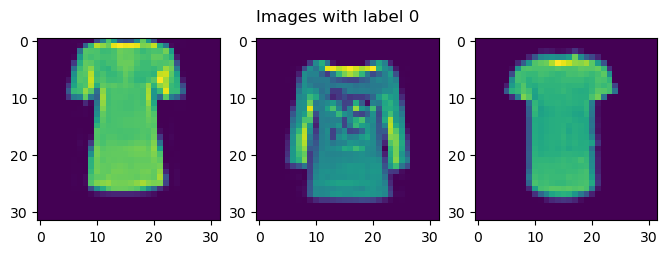

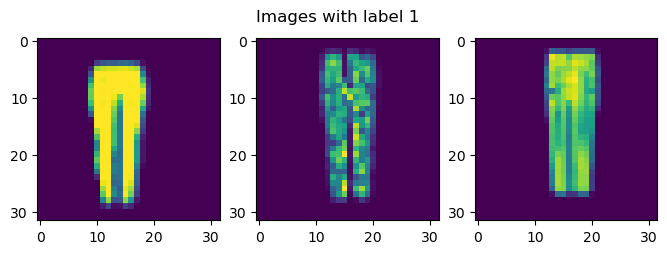

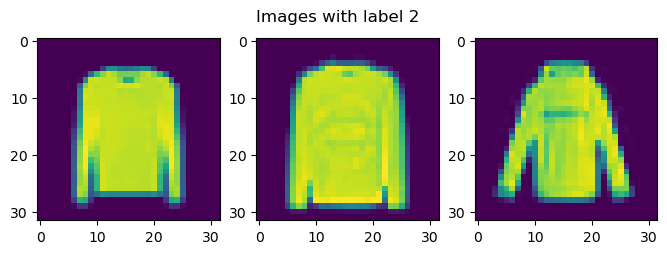

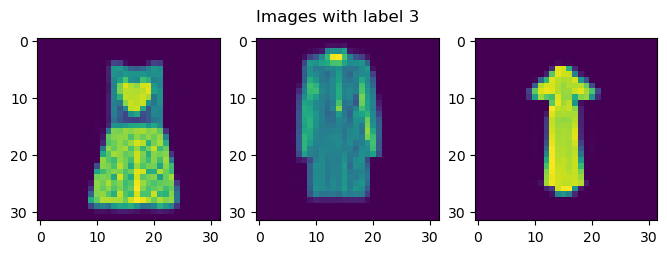

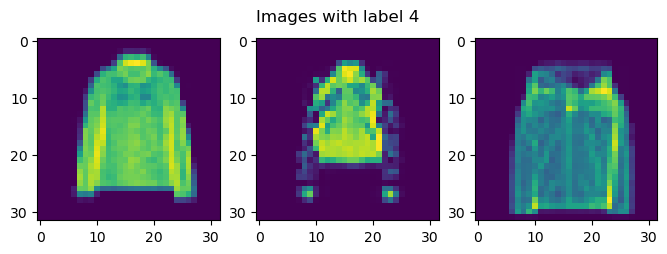

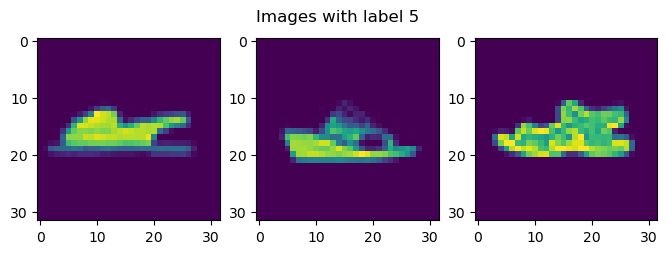

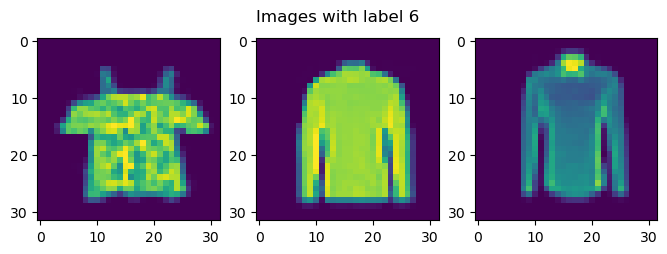

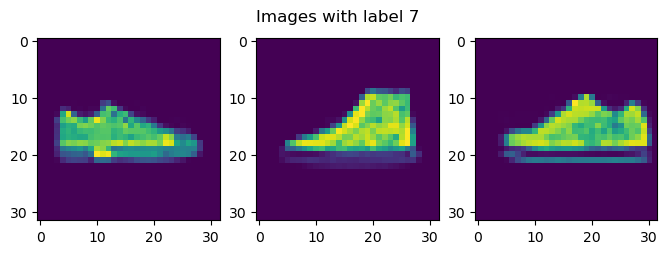

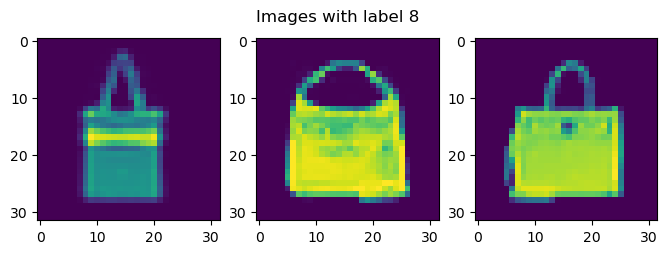

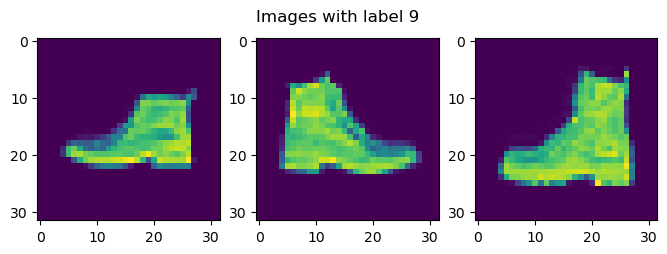

In [7]:
images_wanted = 3
for category in sorted(df.label.unique()):
    fig, axs = plt.subplots(1, images_wanted, figsize=(8, 4))
    for i in range(images_wanted):
        axs[i].imshow(to_photo(df[df.label == category].iloc[[i]]))
    fig.suptitle(f"Images with label {category}", fontsize='large')
    fig.subplots_adjust(top=1.25)
    plt.show()
    

Máme tu tyto kategorie:
* Label 0 - Tričko
* Label 1 - Kalhoty
* Label 2 - Mikina/Svetr
* Label 3 - Šaty
* Label 4 - Bunda
* Label 5 - Otevřená obuv
* Label 6 - Halenka/Bluza
* Label 7 - Bota
* Label 8 - Kabelka/Taška
* Label 9 - Vysoká bota

Jak lze vidět, nachází se zde množství kategoríí, které si jsou velmi podobné, především u kategorií, u kterých si sám nejsem jistý zda se jedná o svetry/trička, či něco úplně jiného.
Dalším zásadním problémem očekávám, že budou boty, jelikož nejsou symetrické a nemají ani zadanou jednotnou orientaci, což muže rozhodit případný rozhodující algoritmus.

Dále se podívám na rozložení hodnot, kategorií, především mě bude zajímat, zda jsou kategorie reprezentovány v podobné míře, či nikoliv.

In [8]:
df.label.value_counts()

2    5645
3    5628
0    5627
5    5618
9    5617
4    5605
8    5571
6    5570
1    5562
7    5557
Name: label, dtype: int64

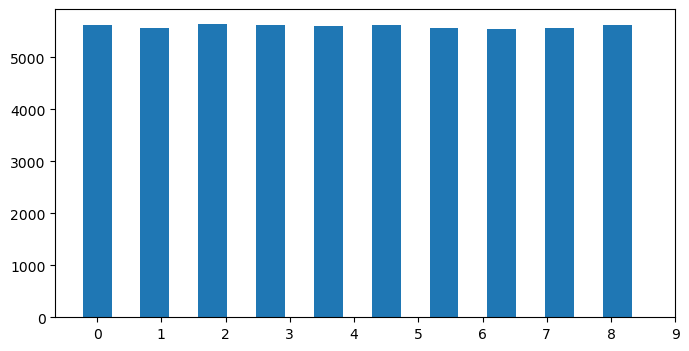

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df.label, rwidth=0.5, bins=10, align='left')
ax.set_xticks(list(range(0, 10)))
plt.show()

Počty kategorií v trénovacích datech jsou vyrovnané a balancování se tudíž není nutné.

# Dopředná neuronová síť

V následující časti, se pokusím vytrénovat na něchto datech dopředné neuronové síťě. Ty pro data strukturovaná do tensorů příliš vhodná nejsou a očekávám tudíž, že se u nich obecně bude dostávat výsledkům horším, než u sítí konvolučních.

In [10]:
# imports for models
from torch import nn
import torch.nn.functional as F
from tqdm import tqdm

Nejdříve, bude pro trénování modelu nutné připravit si data, prozatím pouze nenormalizované.

In [11]:
source_images = df.iloc[:, :1024].to_numpy()
source_labels = df.label.to_numpy()
dataset = torch.utils.data.TensorDataset(torch.tensor(source_images, dtype = torch.float), torch.tensor(source_labels, dtype = torch.long))

print(f"Počet prvků datasetu: {len(dataset)}")

Počet prvků datasetu: 56000


Dále si data rozdělím na trénovací, validační a testovací množiny

In [12]:
generator1 = torch.Generator().manual_seed(42)
split = [0.8, 0.1, 0.1]
train_data, val_data, test_data = torch.utils.data.random_split(dataset, split, generator1)
print("The length of train data is:",len(train_data))
print("The length of val data is:",len(val_data))

The length of train data is: 44800
The length of val data is: 5600


Teď, když data jsou rozděleny, si vytvořím jejich čítače.

In [13]:
training_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
validation_loader = torch.utils.data.DataLoader(val_data, batch_size=128, shuffle=False)

Dále bude nutné připravit funkce, které provedou aktuální trénování, tyto funkce byli převzaty z jupyter notebook cvičení tohoto předmětu a pouze lehce poupraveny.

In [14]:
# using function from courses for epoch training
def train_one_epoch(model, loss_fn, optimizer, training_loader, fill=None):
    running_cum_loss = 0.

    for data in iter(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        
        # Backpropagation
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        last_mean_loss = loss.item()
        running_cum_loss += last_mean_loss * inputs.shape[0]
            
    # Return of the average over the whole training set
    return running_cum_loss / len(train_data)

In [131]:

def train_model(model, loss_fn, optimizer, training_loader, validation_loader, epochs=10, length=len(val_data)):
    # here to avoid the need to specify default loss and optimizer
    # every single time
    if loss_fn is None:
        loss_fn = nn.CrossEntropyLoss()
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters())
    
    # if the vloss somehow ends up being higher during the training,
    # the model shouldn't be trained at all
    best_accuraccy = 0
    non_improvements = 0
    MAX_NON = 3
    for epoch in range(epochs):
        print('EPOCH {}:'.format(epoch + 1))
        model.train(True)
        # One training step
        avg_loss = train_one_epoch(model, loss_fn, optimizer, training_loader)
        model.train(False)
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samoples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuraccy
        avg_vloss = running_cum_vloss / length # len(val_data) used, because all will have same length
        vacc = vcorrect / length
        if vacc > best_accuraccy:
            best_accuraccy = vacc
        else:
            non_improvements += 1
            if (non_improvements > MAX_NON):
                break
        
        print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuraccy: {vacc:.3f}")
    print(f"Best accuracy: {best_accuraccy:.3f}")

Po definici funkcí a dat, lze přejít na trénování modelů.
Bude naším cílem nalézt ideální model.\
Budeme testovat:\
    1. Tvar neuronové sítě,\
    2. Optimalizační funkce,\
    3. Normalizaci či standardizaci dat\
    4. Regularizaci\
    5. Dodávání dropout/batch normalization vrstev\

## Tvar neuronové sítě.

Zde budem postupně porovnávat různé tvary a konfigurace neuronové sítě tvořené pouze Linearními vrstvami spolu s aktivačními funkcemi.

Jako první zde máme jednoduchý model tvořený pouze jednou vrstvou.

In [16]:
# Simples possible model, just linear regression
# made to have something to compare other models to
class LinearNetwork(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        self.fc1 = nn.Linear(1024, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        x = self.fc1(x)
        return x

Dále si vytvoříme modely, tak, že pouze budem pridavat velke 1024,1024 lineární vstvy. Zde očekávám že modely budou relativně přesný ale s příbívaním vrstev prohibitivně časově náročný.

In [17]:

class Depth2Width1024Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        self.fc2 = nn.Linear(1024, 1024)
        self.fc1 = nn.Linear(1024, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x

class Depth3Width1024Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        self.fc3 = nn.Linear(1024, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc1 = nn.Linear(1024, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x

    
class Depth4Width1024Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        
        self.fc4 = nn.Linear(1024, 1024)
        self.fc3 = nn.Linear(1024, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc1 = nn.Linear(1024, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x

Jako první natrénuji model s jednou vrstvou, vysokou přesnost od tohohle modelu očekávat nelze, poslouží ale jako minimum, pod jehož přesnost by se žádný správně nastavený model dostat neměl.

In [18]:
%%time
print("Training LinearNetwork")
model = LinearNetwork()
train_model(model, None, None, training_loader, validation_loader)

Training LinearNetwork
EPOCH 1:
TRAIN loss: 11.963, VALIDATION loss: 11.197, accuraccy: 0.615
EPOCH 2:
TRAIN loss: 11.356, VALIDATION loss: 13.714, accuraccy: 0.575
EPOCH 3:
TRAIN loss: 11.577, VALIDATION loss: 10.478, accuraccy: 0.683
EPOCH 4:
TRAIN loss: 10.898, VALIDATION loss: 10.314, accuraccy: 0.659
EPOCH 5:
TRAIN loss: 10.929, VALIDATION loss: 14.174, accuraccy: 0.624
EPOCH 6:
Best accuracy: 0.683
CPU times: total: 54.9 s
Wall time: 47.1 s


Dále použijeme model s vrstvou navíc.

In [19]:
%%time
print("Training Depth2Width1024Network")
model = Depth2Width1024Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth2Width1024Network
EPOCH 1:
TRAIN loss: 1.771, VALIDATION loss: 0.656, accuraccy: 0.762
EPOCH 2:
TRAIN loss: 0.686, VALIDATION loss: 0.717, accuraccy: 0.712
EPOCH 3:
TRAIN loss: 0.677, VALIDATION loss: 0.678, accuraccy: 0.763
EPOCH 4:
TRAIN loss: 0.662, VALIDATION loss: 0.675, accuraccy: 0.767
EPOCH 5:
TRAIN loss: 0.667, VALIDATION loss: 0.769, accuraccy: 0.714
EPOCH 6:
TRAIN loss: 0.649, VALIDATION loss: 0.722, accuraccy: 0.762
EPOCH 7:
TRAIN loss: 0.633, VALIDATION loss: 0.688, accuraccy: 0.768
EPOCH 8:
TRAIN loss: 0.624, VALIDATION loss: 0.656, accuraccy: 0.785
EPOCH 9:
TRAIN loss: 0.608, VALIDATION loss: 0.635, accuraccy: 0.790
EPOCH 10:
Best accuracy: 0.790
CPU times: total: 10min 42s
Wall time: 6min 54s


S přidáním vrstvy přesnost vzrostla o 10 %, ale doba trénování se více jak zpětinásobila.

In [20]:
%%time
print("Training Depth3Width1024Network")
model = Depth3Width1024Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth3Width1024Network
EPOCH 1:
TRAIN loss: 1.101, VALIDATION loss: 0.705, accuraccy: 0.727
EPOCH 2:
TRAIN loss: 0.606, VALIDATION loss: 0.574, accuraccy: 0.791
EPOCH 3:
TRAIN loss: 0.567, VALIDATION loss: 0.604, accuraccy: 0.779
EPOCH 4:
TRAIN loss: 0.536, VALIDATION loss: 0.574, accuraccy: 0.785
EPOCH 5:
TRAIN loss: 0.521, VALIDATION loss: 0.566, accuraccy: 0.800
EPOCH 6:
TRAIN loss: 0.509, VALIDATION loss: 0.547, accuraccy: 0.810
EPOCH 7:
TRAIN loss: 0.501, VALIDATION loss: 0.596, accuraccy: 0.777
EPOCH 8:
TRAIN loss: 0.487, VALIDATION loss: 0.551, accuraccy: 0.810
EPOCH 9:
TRAIN loss: 0.476, VALIDATION loss: 0.557, accuraccy: 0.812
EPOCH 10:
Best accuracy: 0.812
CPU times: total: 21min 50s
Wall time: 13min 56s


Přídání poslední vrstvy sice přesnost zvýšilo nad hranici 82 %, ale doba trénovaní se téměř zřtyřnásobila na necelých 20 minut. Další vrstvy této velikost, již testovat na tomto stroji není praktické. Postoupíme dále s neuronovýma sítěma s menším množstvím neuronů na vrstvu.

Dálší velikost vrstev, s kterou budu experimentovat je 256, zde očekávám zvýšenou nutnost vrstev, pro stejný výsledek jako v předchozích modelech, ale mnohonásobně kratší dobu trénování.

In [21]:
class Depth2Width256Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        self.fc2 = nn.Linear(1024, 256)
        self.fc1 = nn.Linear(256, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x

class Depth3Width256Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        self.fc3 = nn.Linear(1024, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc1 = nn.Linear(256, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x

    
class Depth4Width256Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        
        self.fc4 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc1 = nn.Linear(256, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x
class Depth5Width256Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        self.fc5 = nn.Linear(1024, 256)
        self.fc4 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc1 = nn.Linear(256, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x
class Depth6Width256Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        
        self.fc6 = nn.Linear(1024, 256)
        self.fc5 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 256)

        self.fc3 = nn.Linear(256, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc1 = nn.Linear(256, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x

In [22]:
%%time
print("Training Depth2Width256Network")
model = Depth2Width256Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth2Width256Network
EPOCH 1:
TRAIN loss: 1.348, VALIDATION loss: 0.689, accuraccy: 0.749
EPOCH 2:
TRAIN loss: 0.697, VALIDATION loss: 0.664, accuraccy: 0.770
EPOCH 3:
TRAIN loss: 0.682, VALIDATION loss: 0.663, accuraccy: 0.763
EPOCH 4:
TRAIN loss: 0.669, VALIDATION loss: 0.647, accuraccy: 0.775
EPOCH 5:
TRAIN loss: 0.639, VALIDATION loss: 0.685, accuraccy: 0.774
EPOCH 6:
TRAIN loss: 0.629, VALIDATION loss: 0.661, accuraccy: 0.774
EPOCH 7:
TRAIN loss: 0.642, VALIDATION loss: 0.661, accuraccy: 0.781
EPOCH 8:
TRAIN loss: 0.633, VALIDATION loss: 0.620, accuraccy: 0.794
EPOCH 9:
TRAIN loss: 0.614, VALIDATION loss: 0.638, accuraccy: 0.795
EPOCH 10:
Best accuracy: 0.795
CPU times: total: 4min 17s
Wall time: 3min 2s


In [23]:
%%time
print("Training Depth3Width256Network")
model = Depth3Width256Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth3Width256Network
EPOCH 1:
TRAIN loss: 0.875, VALIDATION loss: 0.595, accuraccy: 0.776
EPOCH 2:
TRAIN loss: 0.610, VALIDATION loss: 0.560, accuraccy: 0.789
EPOCH 3:
TRAIN loss: 0.568, VALIDATION loss: 0.573, accuraccy: 0.791
EPOCH 4:
TRAIN loss: 0.545, VALIDATION loss: 0.581, accuraccy: 0.796
EPOCH 5:
TRAIN loss: 0.521, VALIDATION loss: 0.555, accuraccy: 0.810
EPOCH 6:
TRAIN loss: 0.507, VALIDATION loss: 0.509, accuraccy: 0.818
EPOCH 7:
TRAIN loss: 0.502, VALIDATION loss: 0.544, accuraccy: 0.811
EPOCH 8:
TRAIN loss: 0.484, VALIDATION loss: 0.527, accuraccy: 0.813
EPOCH 9:
TRAIN loss: 0.470, VALIDATION loss: 0.545, accuraccy: 0.810
EPOCH 10:
TRAIN loss: 0.471, VALIDATION loss: 0.523, accuraccy: 0.825
Best accuracy: 0.825
CPU times: total: 5min 4s
Wall time: 3min 16s


In [24]:
%%time
print("Training Depth4Width256Network")
model = Depth4Width256Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth4Width256Network
EPOCH 1:
TRAIN loss: 0.764, VALIDATION loss: 0.648, accuraccy: 0.737
EPOCH 2:
TRAIN loss: 0.589, VALIDATION loss: 0.578, accuraccy: 0.792
EPOCH 3:
TRAIN loss: 0.548, VALIDATION loss: 0.616, accuraccy: 0.766
EPOCH 4:
TRAIN loss: 0.522, VALIDATION loss: 0.575, accuraccy: 0.807
EPOCH 5:
TRAIN loss: 0.498, VALIDATION loss: 0.506, accuraccy: 0.818
EPOCH 6:
TRAIN loss: 0.480, VALIDATION loss: 0.522, accuraccy: 0.816
EPOCH 7:
TRAIN loss: 0.463, VALIDATION loss: 0.544, accuraccy: 0.812
EPOCH 8:
TRAIN loss: 0.458, VALIDATION loss: 0.509, accuraccy: 0.827
EPOCH 9:
Best accuracy: 0.827
CPU times: total: 5min 19s
Wall time: 3min 8s


In [25]:
%%time
print("Training Depth5Width256Network")
model = Depth5Width256Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth5Width256Network
EPOCH 1:
TRAIN loss: 0.738, VALIDATION loss: 0.581, accuraccy: 0.785
EPOCH 2:
TRAIN loss: 0.591, VALIDATION loss: 0.602, accuraccy: 0.775
EPOCH 3:
TRAIN loss: 0.539, VALIDATION loss: 0.558, accuraccy: 0.798
EPOCH 4:
TRAIN loss: 0.514, VALIDATION loss: 0.533, accuraccy: 0.799
EPOCH 5:
TRAIN loss: 0.490, VALIDATION loss: 0.513, accuraccy: 0.821
EPOCH 6:
TRAIN loss: 0.473, VALIDATION loss: 0.519, accuraccy: 0.815
EPOCH 7:
TRAIN loss: 0.456, VALIDATION loss: 0.518, accuraccy: 0.818
EPOCH 8:
TRAIN loss: 0.444, VALIDATION loss: 0.493, accuraccy: 0.830
EPOCH 9:
Best accuracy: 0.830
CPU times: total: 6min 3s
Wall time: 3min 33s


In [26]:
%%time
print("Training Depth6Width256Network")
model = Depth6Width256Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth6Width256Network
EPOCH 1:
TRAIN loss: 0.766, VALIDATION loss: 0.627, accuraccy: 0.776
EPOCH 2:
TRAIN loss: 0.600, VALIDATION loss: 0.553, accuraccy: 0.800
EPOCH 3:
TRAIN loss: 0.552, VALIDATION loss: 0.574, accuraccy: 0.785
EPOCH 4:
TRAIN loss: 0.517, VALIDATION loss: 0.502, accuraccy: 0.813
EPOCH 5:
TRAIN loss: 0.493, VALIDATION loss: 0.537, accuraccy: 0.806
EPOCH 6:
TRAIN loss: 0.472, VALIDATION loss: 0.500, accuraccy: 0.817
EPOCH 7:
TRAIN loss: 0.454, VALIDATION loss: 0.521, accuraccy: 0.808
EPOCH 8:
TRAIN loss: 0.443, VALIDATION loss: 0.465, accuraccy: 0.840
EPOCH 9:
Best accuracy: 0.840
CPU times: total: 6min 55s
Wall time: 4min 13s


Modely se zde trénují mnohem rychleji a lze tak dokázat výšší přesnosti než s vrstvama o pobírající 1024 dimenzí. S přidáváním vrstev se však model přestává zlepšovat u 4 vrstev ve chvíli, kdy se model blíží k 83% přesnosti.

In [27]:
class Depth2Width512Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        self.fc2 = nn.Linear(1024, 512)
        self.fc1 = nn.Linear(512, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x

class Depth3Width512Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        self.fc3 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc1 = nn.Linear(512, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x

    
class Depth4Width512Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        
        self.fc4 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc1 = nn.Linear(512, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x
class Depth5Width512Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        self.fc5 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc1 = nn.Linear(512, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x

In [28]:
%%time
print("Training Depth2Width512Network")
model = Depth2Width512Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth2Width512Network
EPOCH 1:
TRAIN loss: 1.762, VALIDATION loss: 0.703, accuraccy: 0.756
EPOCH 2:
TRAIN loss: 0.668, VALIDATION loss: 0.721, accuraccy: 0.744
EPOCH 3:
TRAIN loss: 0.663, VALIDATION loss: 0.653, accuraccy: 0.768
EPOCH 4:
TRAIN loss: 0.662, VALIDATION loss: 0.688, accuraccy: 0.752
EPOCH 5:
TRAIN loss: 0.646, VALIDATION loss: 0.685, accuraccy: 0.775
EPOCH 6:
TRAIN loss: 0.630, VALIDATION loss: 0.610, accuraccy: 0.787
EPOCH 7:
TRAIN loss: 0.620, VALIDATION loss: 0.658, accuraccy: 0.773
EPOCH 8:
Best accuracy: 0.787
CPU times: total: 5min 6s
Wall time: 3min 1s


In [29]:
%%time
print("Training Depth3Width512Network")
model = Depth3Width512Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth3Width512Network
EPOCH 1:
TRAIN loss: 0.947, VALIDATION loss: 0.662, accuraccy: 0.759
EPOCH 2:
TRAIN loss: 0.607, VALIDATION loss: 0.572, accuraccy: 0.789
EPOCH 3:
TRAIN loss: 0.579, VALIDATION loss: 0.591, accuraccy: 0.794
EPOCH 4:
TRAIN loss: 0.551, VALIDATION loss: 0.572, accuraccy: 0.798
EPOCH 5:
TRAIN loss: 0.538, VALIDATION loss: 0.530, accuraccy: 0.812
EPOCH 6:
TRAIN loss: 0.518, VALIDATION loss: 0.581, accuraccy: 0.795
EPOCH 7:
TRAIN loss: 0.504, VALIDATION loss: 0.547, accuraccy: 0.809
EPOCH 8:
TRAIN loss: 0.492, VALIDATION loss: 0.540, accuraccy: 0.810
EPOCH 9:
Best accuracy: 0.812
CPU times: total: 8min 31s
Wall time: 5min


In [30]:
%%time
print("Training Depth4Width512Network")
model = Depth4Width512Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth4Width512Network
EPOCH 1:
TRAIN loss: 0.818, VALIDATION loss: 0.646, accuraccy: 0.759
EPOCH 2:
TRAIN loss: 0.590, VALIDATION loss: 0.573, accuraccy: 0.784
EPOCH 3:
TRAIN loss: 0.549, VALIDATION loss: 0.551, accuraccy: 0.801
EPOCH 4:
TRAIN loss: 0.514, VALIDATION loss: 0.536, accuraccy: 0.810
EPOCH 5:
TRAIN loss: 0.495, VALIDATION loss: 0.521, accuraccy: 0.814
EPOCH 6:
TRAIN loss: 0.480, VALIDATION loss: 0.512, accuraccy: 0.821
EPOCH 7:
TRAIN loss: 0.459, VALIDATION loss: 0.511, accuraccy: 0.822
EPOCH 8:
TRAIN loss: 0.448, VALIDATION loss: 0.515, accuraccy: 0.822
EPOCH 9:
TRAIN loss: 0.448, VALIDATION loss: 0.493, accuraccy: 0.830
EPOCH 10:
TRAIN loss: 0.429, VALIDATION loss: 0.516, accuraccy: 0.815
Best accuracy: 0.830
CPU times: total: 13min 21s
Wall time: 10min 28s


In [31]:
%%time
print("Training Depth5Width512Network")
model = Depth5Width512Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth5Width512Network
EPOCH 1:
TRAIN loss: 0.773, VALIDATION loss: 0.752, accuraccy: 0.743
EPOCH 2:
TRAIN loss: 0.596, VALIDATION loss: 0.583, accuraccy: 0.801
EPOCH 3:
TRAIN loss: 0.547, VALIDATION loss: 0.594, accuraccy: 0.785
EPOCH 4:
TRAIN loss: 0.517, VALIDATION loss: 0.537, accuraccy: 0.813
EPOCH 5:
TRAIN loss: 0.493, VALIDATION loss: 0.516, accuraccy: 0.817
EPOCH 6:
TRAIN loss: 0.477, VALIDATION loss: 0.515, accuraccy: 0.817
EPOCH 7:
TRAIN loss: 0.460, VALIDATION loss: 0.524, accuraccy: 0.821
EPOCH 8:
TRAIN loss: 0.448, VALIDATION loss: 0.484, accuraccy: 0.824
EPOCH 9:
TRAIN loss: 0.437, VALIDATION loss: 0.487, accuraccy: 0.821
EPOCH 10:
TRAIN loss: 0.424, VALIDATION loss: 0.477, accuraccy: 0.830
Best accuracy: 0.830
CPU times: total: 16min 24s
Wall time: 13min 8s


Neuronová síť o s vratvami o velikosti dimenze 512, nedosahuje lepší výsledku jak ta s 256. Pozoruhodně však zastavuje u přibližné hranice 83 %. To předpokládám je intristický limit těchto dat bez dalších úprav. Nejvíce úsposebným modelem pro tyto data se zde prokázal model se čtyřma vrstvama po 256 neuronech.

Jelikož je to ovšem model, s nejmenším počtem neuronů na vrstvu, pro úplnost ověřím zda se nebude dařit modelu s ještě menším množství neuronů. Neočekávám ovšem zlepšení oproti 256.

In [32]:
class Depth2Width128Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        self.fc2 = nn.Linear(1024, 128)
        self.fc1 = nn.Linear(128, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x

class Depth3Width128Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        self.fc3 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc1 = nn.Linear(128, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x

    
class Depth4Width128Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        
        self.fc4 = nn.Linear(1024, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc1 = nn.Linear(128, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x
class Depth5Width128Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        self.fc5 = nn.Linear(1024, 128)
        self.fc4 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc1 = nn.Linear(128, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x
class Depth6Width128Network(nn.Module):
    def __init__(self):
        """
        Constructor - defines all elements with parameters
        """
        super().__init__()
        
        self.fc6 = nn.Linear(1024, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 128)

        self.fc3 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc1 = nn.Linear(128, 10)

    def forward(self, x):
        """
        Calculation of the output of the network
        """
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc2(x))
        x = self.fc1(x)
        return x

In [33]:
%%time
print("Training Depth2Width128Network")
model = Depth2Width128Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth2Width128Network
EPOCH 1:
TRAIN loss: 1.131, VALIDATION loss: 0.713, accuraccy: 0.721
EPOCH 2:
TRAIN loss: 0.693, VALIDATION loss: 0.705, accuraccy: 0.748
EPOCH 3:
TRAIN loss: 0.665, VALIDATION loss: 0.658, accuraccy: 0.766
EPOCH 4:
TRAIN loss: 0.653, VALIDATION loss: 0.654, accuraccy: 0.778
EPOCH 5:
TRAIN loss: 0.638, VALIDATION loss: 0.739, accuraccy: 0.750
EPOCH 6:
TRAIN loss: 0.625, VALIDATION loss: 0.742, accuraccy: 0.752
EPOCH 7:
TRAIN loss: 0.623, VALIDATION loss: 0.662, accuraccy: 0.781
EPOCH 8:
TRAIN loss: 0.620, VALIDATION loss: 0.612, accuraccy: 0.791
EPOCH 9:
TRAIN loss: 0.612, VALIDATION loss: 0.658, accuraccy: 0.773
EPOCH 10:
Best accuracy: 0.791
CPU times: total: 2min 47s
Wall time: 1min 37s


In [34]:
%%time
print("Training Depth3Width128Network")
model = Depth3Width128Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth3Width128Network
EPOCH 1:
TRAIN loss: 0.876, VALIDATION loss: 0.638, accuraccy: 0.753
EPOCH 2:
TRAIN loss: 0.625, VALIDATION loss: 0.597, accuraccy: 0.778
EPOCH 3:
TRAIN loss: 0.572, VALIDATION loss: 0.556, accuraccy: 0.792
EPOCH 4:
TRAIN loss: 0.543, VALIDATION loss: 0.547, accuraccy: 0.801
EPOCH 5:
TRAIN loss: 0.530, VALIDATION loss: 0.585, accuraccy: 0.791
EPOCH 6:
TRAIN loss: 0.517, VALIDATION loss: 0.564, accuraccy: 0.784
EPOCH 7:
TRAIN loss: 0.502, VALIDATION loss: 0.523, accuraccy: 0.812
EPOCH 8:
TRAIN loss: 0.490, VALIDATION loss: 0.532, accuraccy: 0.802
EPOCH 9:
TRAIN loss: 0.486, VALIDATION loss: 0.525, accuraccy: 0.818
EPOCH 10:
Best accuracy: 0.818
CPU times: total: 3min 11s
Wall time: 1min 50s


In [35]:
%%time
print("Training Depth4Width128Network")
model = Depth4Width128Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth4Width128Network
EPOCH 1:
TRAIN loss: 0.763, VALIDATION loss: 0.636, accuraccy: 0.766
EPOCH 2:
TRAIN loss: 0.585, VALIDATION loss: 0.521, accuraccy: 0.811
EPOCH 3:
TRAIN loss: 0.540, VALIDATION loss: 0.531, accuraccy: 0.808
EPOCH 4:
TRAIN loss: 0.522, VALIDATION loss: 0.543, accuraccy: 0.798
EPOCH 5:
TRAIN loss: 0.501, VALIDATION loss: 0.526, accuraccy: 0.812
EPOCH 6:
TRAIN loss: 0.485, VALIDATION loss: 0.537, accuraccy: 0.804
EPOCH 7:
TRAIN loss: 0.478, VALIDATION loss: 0.503, accuraccy: 0.822
EPOCH 8:
Best accuracy: 0.822
CPU times: total: 2min 57s
Wall time: 1min 45s


In [36]:
%%time
print("Training Depth5Width128Network")
model = Depth5Width128Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth5Width128Network
EPOCH 1:
TRAIN loss: 0.749, VALIDATION loss: 0.590, accuraccy: 0.784
EPOCH 2:
TRAIN loss: 0.585, VALIDATION loss: 0.560, accuraccy: 0.801
EPOCH 3:
TRAIN loss: 0.537, VALIDATION loss: 0.521, accuraccy: 0.812
EPOCH 4:
TRAIN loss: 0.515, VALIDATION loss: 0.522, accuraccy: 0.812
EPOCH 5:
TRAIN loss: 0.490, VALIDATION loss: 0.513, accuraccy: 0.809
EPOCH 6:
TRAIN loss: 0.472, VALIDATION loss: 0.494, accuraccy: 0.819
EPOCH 7:
TRAIN loss: 0.457, VALIDATION loss: 0.519, accuraccy: 0.822
EPOCH 8:
TRAIN loss: 0.449, VALIDATION loss: 0.506, accuraccy: 0.820
EPOCH 9:
TRAIN loss: 0.436, VALIDATION loss: 0.485, accuraccy: 0.830
EPOCH 10:
Best accuracy: 0.830
CPU times: total: 4min 12s
Wall time: 2min 36s


In [37]:
%%time
print("Training Depth6Width128Network")
model = Depth6Width128Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth6Width128Network
EPOCH 1:
TRAIN loss: 0.749, VALIDATION loss: 0.632, accuraccy: 0.770
EPOCH 2:
TRAIN loss: 0.588, VALIDATION loss: 0.630, accuraccy: 0.764
EPOCH 3:
TRAIN loss: 0.536, VALIDATION loss: 0.552, accuraccy: 0.798
EPOCH 4:
TRAIN loss: 0.510, VALIDATION loss: 0.590, accuraccy: 0.775
EPOCH 5:
TRAIN loss: 0.481, VALIDATION loss: 0.508, accuraccy: 0.813
EPOCH 6:
TRAIN loss: 0.467, VALIDATION loss: 0.514, accuraccy: 0.817
EPOCH 7:
TRAIN loss: 0.450, VALIDATION loss: 0.516, accuraccy: 0.819
EPOCH 8:
TRAIN loss: 0.441, VALIDATION loss: 0.507, accuraccy: 0.813
EPOCH 9:
Best accuracy: 0.819
CPU times: total: 4min 5s
Wall time: 2min 48s


Síť o šesti vrstev se také dostala na přesnost 0.83 v relativně nízkým čase. Máme tedy vybrány dva přibližně rovnocenný modely, jejichž schopnosti budem taky porovnávat v dalších testech.

## Normalizace Dat

Firstly we normalize DataFrame

In [38]:
def normalize(row: pd.Series):
    return (row - row.min()) / (row.max() - row.min())
data_norm = df.copy()
data_norm.iloc[:, :1024] = data_norm.iloc[:,:1024].apply(normalize, axis=1)
display(data_norm.head())
print(data_norm.max().max())
print(data_norm.min().min())

C:\Users\alesp\AppData\Local\Temp\ipykernel_8448\2151226658.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_norm.iloc[:, :1024] = data_norm.iloc[:,:1024].apply(normalize, axis=1)


,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.005319,0.005319,0.005319,0.010638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


9.0
0.0


Then we put it into pytorch dataset

In [39]:
source_images = data_norm.iloc[:, :1024].to_numpy()
source_labels = data_norm.label.to_numpy()
dataset_norm = torch.utils.data.TensorDataset(torch.tensor(source_images, dtype = torch.float), torch.tensor(source_labels, dtype = torch.long))

Now we split it and create DataLoaders.

In [40]:
train_norm_data, val_norm_data, test_norm_data = torch.utils.data.random_split(dataset_norm, split, generator1)
training_norm_loader = torch.utils.data.DataLoader(train_norm_data, batch_size=32, shuffle=True)
validation_norm_loader = torch.utils.data.DataLoader(val_norm_data, batch_size=128, shuffle=False)

Pro kompletnost ještě implementuju StandardScaler

In [41]:
from sklearn.preprocessing import StandardScaler

data_scaler = df.copy()
scaler = StandardScaler()
data_scaler.iloc[:,:1024] = scaler.fit_transform(data_scaler.iloc[:,:1024])
data_scaler.head()

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
0,0.084707,0.084707,0.084707,0.084707,0.084693,0.084693,0.084667,0.084568,0.078846,0.066326,...,0.049110,0.050245,0.055840,0.076618,0.084267,0.084631,0.084690,0.084707,0.084707,7
1,2.093281,2.093281,2.093281,2.093281,2.093225,2.093225,2.762639,2.762433,2.646666,2.901649,...,1.518461,1.521343,1.558993,1.966749,2.091770,2.093096,2.093158,2.093281,2.093281,0
2,-0.584818,-0.584818,-0.584818,-0.584818,-0.584817,-0.584817,-0.584826,-0.584898,-0.563109,-0.500738,...,-0.440674,-0.440121,-0.445210,-0.553426,-0.584900,-0.584858,-0.584799,-0.584818,-0.584818,6
3,0.754231,0.754231,0.754231,0.754231,0.754204,0.754204,0.754160,0.754034,0.720801,0.633391,...,0.538894,0.540611,0.556891,0.706662,0.753435,0.754119,0.754179,0.754231,0.754231,3
4,-0.584818,-0.584818,-0.584818,-0.584818,-0.584817,-0.584817,-0.584826,-0.584898,-0.563109,-0.500738,...,-0.440674,-0.440121,-0.445210,-0.553426,-0.584900,-0.584858,-0.584799,-0.584818,-0.584818,3


In [42]:
source_images = data_scaler.iloc[:, :1024].to_numpy()
source_labels = data_scaler.label.to_numpy()
dataset_scaler = torch.utils.data.TensorDataset(torch.tensor(source_images, dtype = torch.float), torch.tensor(source_labels, dtype = torch.long))
train_scaler_data, val_scaler_data, test_scaler_data = torch.utils.data.random_split(dataset_scaler, split, generator1)
training_scaler_loader = torch.utils.data.DataLoader(train_scaler_data, batch_size=32, shuffle=True)
validation_scaler_loader = torch.utils.data.DataLoader(val_scaler_data, batch_size=128, shuffle=False)

Máme načtený všechny Loadery, teď je můžem porovnat na modelech, které jsme si vybrali v předchozích testech. V testech očekávám, že nejlépe si povedou data normalizované podle řádků, hůře si povede nenormalizovaný obrazek a neočekávám dobré výsledky od dat, na které byl využit StandardScaler

In [43]:
%%time
print("Training Depth4Width256Network without Normalization")
model = Depth4Width256Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth4Width256Network without Normalization
EPOCH 1:
TRAIN loss: 0.769, VALIDATION loss: 0.618, accuraccy: 0.779
EPOCH 2:
TRAIN loss: 0.594, VALIDATION loss: 0.623, accuraccy: 0.771
EPOCH 3:
TRAIN loss: 0.545, VALIDATION loss: 0.525, accuraccy: 0.812
EPOCH 4:
TRAIN loss: 0.517, VALIDATION loss: 0.640, accuraccy: 0.771
EPOCH 5:
TRAIN loss: 0.504, VALIDATION loss: 0.526, accuraccy: 0.809
EPOCH 6:
TRAIN loss: 0.481, VALIDATION loss: 0.506, accuraccy: 0.816
EPOCH 7:
TRAIN loss: 0.463, VALIDATION loss: 0.521, accuraccy: 0.820
EPOCH 8:
TRAIN loss: 0.454, VALIDATION loss: 0.502, accuraccy: 0.822
EPOCH 9:
TRAIN loss: 0.446, VALIDATION loss: 0.512, accuraccy: 0.828
EPOCH 10:
Best accuracy: 0.828
CPU times: total: 5min 33s
Wall time: 3min 3s


In [44]:
%%time
print("Training Depth4Width256Network with Normalization")
model = Depth4Width256Network()
train_model(model, None, None, training_norm_loader, validation_norm_loader)

Training Depth4Width256Network with Normalization
EPOCH 1:
TRAIN loss: 0.705, VALIDATION loss: 0.552, accuraccy: 0.796
EPOCH 2:
TRAIN loss: 0.518, VALIDATION loss: 0.502, accuraccy: 0.811
EPOCH 3:
TRAIN loss: 0.458, VALIDATION loss: 0.491, accuraccy: 0.817
EPOCH 4:
TRAIN loss: 0.429, VALIDATION loss: 0.444, accuraccy: 0.835
EPOCH 5:
TRAIN loss: 0.399, VALIDATION loss: 0.437, accuraccy: 0.833
EPOCH 6:
TRAIN loss: 0.379, VALIDATION loss: 0.434, accuraccy: 0.841
EPOCH 7:
TRAIN loss: 0.361, VALIDATION loss: 0.488, accuraccy: 0.818
EPOCH 8:
TRAIN loss: 0.347, VALIDATION loss: 0.427, accuraccy: 0.842
EPOCH 9:
TRAIN loss: 0.332, VALIDATION loss: 0.453, accuraccy: 0.839
EPOCH 10:
TRAIN loss: 0.319, VALIDATION loss: 0.420, accuraccy: 0.848
Best accuracy: 0.848
CPU times: total: 5min 40s
Wall time: 3min 6s


In [45]:
%%time
print("Training Depth4Width256Network with StandardScaler")
model = Depth4Width256Network()
train_model(model, None, None, training_scaler_loader, validation_scaler_loader)

Training Depth4Width256Network with StandardScaler
EPOCH 1:
TRAIN loss: 0.671, VALIDATION loss: 0.582, accuraccy: 0.789
EPOCH 2:
TRAIN loss: 0.506, VALIDATION loss: 0.538, accuraccy: 0.800
EPOCH 3:
TRAIN loss: 0.460, VALIDATION loss: 0.483, accuraccy: 0.823
EPOCH 4:
TRAIN loss: 0.415, VALIDATION loss: 0.501, accuraccy: 0.826
EPOCH 5:
TRAIN loss: 0.392, VALIDATION loss: 0.484, accuraccy: 0.831
EPOCH 6:
TRAIN loss: 0.368, VALIDATION loss: 0.491, accuraccy: 0.832
EPOCH 7:
TRAIN loss: 0.350, VALIDATION loss: 0.469, accuraccy: 0.841
EPOCH 8:
TRAIN loss: 0.333, VALIDATION loss: 0.481, accuraccy: 0.834
EPOCH 9:
TRAIN loss: 0.317, VALIDATION loss: 0.500, accuraccy: 0.832
EPOCH 10:
TRAIN loss: 0.300, VALIDATION loss: 0.486, accuraccy: 0.839
Best accuracy: 0.841
CPU times: total: 5min 30s
Wall time: 3min


Model používající normalizované data vykazuje zásadní zlepšení v přesnosti, očividně v tomhle případě normalizace pomohla.

In [46]:
%%time
print("Training Depth6Width128Network without Normalization")
model = Depth6Width128Network()
train_model(model, None, None, training_loader, validation_loader)

Training Depth6Width128Network without Normalization
EPOCH 1:
TRAIN loss: 0.751, VALIDATION loss: 0.567, accuraccy: 0.801
EPOCH 2:
TRAIN loss: 0.583, VALIDATION loss: 0.586, accuraccy: 0.800
EPOCH 3:
TRAIN loss: 0.545, VALIDATION loss: 0.501, accuraccy: 0.814
EPOCH 4:
TRAIN loss: 0.506, VALIDATION loss: 0.545, accuraccy: 0.805
EPOCH 5:
TRAIN loss: 0.485, VALIDATION loss: 0.519, accuraccy: 0.810
EPOCH 6:
Best accuracy: 0.814
CPU times: total: 2min 36s
Wall time: 1min 25s


In [47]:
%%time
print("Training Depth6Width128Network with Normalization")
model = Depth6Width128Network()
train_model(model, None, None, training_norm_loader, validation_norm_loader)

Training Depth6Width128Network with Normalization
EPOCH 1:
TRAIN loss: 0.809, VALIDATION loss: 0.640, accuraccy: 0.768
EPOCH 2:
TRAIN loss: 0.563, VALIDATION loss: 0.536, accuraccy: 0.803
EPOCH 3:
TRAIN loss: 0.504, VALIDATION loss: 0.485, accuraccy: 0.825
EPOCH 4:
TRAIN loss: 0.467, VALIDATION loss: 0.514, accuraccy: 0.804
EPOCH 5:
TRAIN loss: 0.442, VALIDATION loss: 0.443, accuraccy: 0.832
EPOCH 6:
TRAIN loss: 0.416, VALIDATION loss: 0.462, accuraccy: 0.830
EPOCH 7:
TRAIN loss: 0.403, VALIDATION loss: 0.463, accuraccy: 0.831
EPOCH 8:
TRAIN loss: 0.388, VALIDATION loss: 0.445, accuraccy: 0.839
EPOCH 9:
TRAIN loss: 0.374, VALIDATION loss: 0.440, accuraccy: 0.842
EPOCH 10:
Best accuracy: 0.842
CPU times: total: 4min 27s
Wall time: 2min 24s


In [48]:
%%time
print("Training Depth6Width128Network with StandardScaler")
model = Depth6Width128Network()
train_model(model, None, None, training_scaler_loader, validation_scaler_loader)

Training Depth6Width128Network with StandardScaler
EPOCH 1:
TRAIN loss: 0.738, VALIDATION loss: 0.599, accuraccy: 0.784
EPOCH 2:
TRAIN loss: 0.540, VALIDATION loss: 0.532, accuraccy: 0.806
EPOCH 3:
TRAIN loss: 0.482, VALIDATION loss: 0.516, accuraccy: 0.813
EPOCH 4:
TRAIN loss: 0.447, VALIDATION loss: 0.496, accuraccy: 0.822
EPOCH 5:
TRAIN loss: 0.418, VALIDATION loss: 0.507, accuraccy: 0.815
EPOCH 6:
TRAIN loss: 0.394, VALIDATION loss: 0.498, accuraccy: 0.818
EPOCH 7:
TRAIN loss: 0.373, VALIDATION loss: 0.489, accuraccy: 0.825
EPOCH 8:
TRAIN loss: 0.356, VALIDATION loss: 0.490, accuraccy: 0.826
EPOCH 9:
TRAIN loss: 0.345, VALIDATION loss: 0.499, accuraccy: 0.830
EPOCH 10:
TRAIN loss: 0.326, VALIDATION loss: 0.482, accuraccy: 0.835
Best accuracy: 0.835
CPU times: total: 4min 22s
Wall time: 2min 23s


Nejlepší výsledky má D4W256 na datech, na kterých byla nanesena Normalizace. Obecně pořadí podle přesnosti, co se týče normalizace jsou Normalizace > StandardScaler  > Nic

## Regularizace

V této části budu používat již prokázaně lepší D4W256 model

definuji si funkci s l1 regularizaci.

In [49]:
def train_one_epoch_l1(model: Depth4Width256Network, loss_fn, optimizer, training_loader, l_alpha=0.05):
    running_cum_loss = 0.

    for data in iter(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)
        
        l_reg = 0
        l_reg += torch.linalg.vector_norm(model.fc3.weight.flatten(),1)
        l_reg += torch.linalg.vector_norm(model.fc4.weight.flatten(),1)



        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels) + l_reg * l_alpha
        
        # Backpropagation
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        last_mean_loss = loss.item()
        running_cum_loss += last_mean_loss * inputs.shape[0]
            
    # Return of the average over the whole training set
    return running_cum_loss / len(train_data)

Trénovací funkce s l2 regularizací.

In [50]:
def train_one_epoch_l2(model: Depth4Width256Network, loss_fn, optimizer, training_loader, l_alpha=0.05):
    running_cum_loss = 0.

    for data in iter(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)
        
        l_reg = 0
        l_reg += torch.dot(model.fc3.weight.flatten(), model.fc3.weight.flatten())
        l_reg += torch.dot(model.fc4.weight.flatten(), model.fc4.weight.flatten())



        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels) + l_reg * l_alpha
        
        # Backpropagation
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        last_mean_loss = loss.item()
        running_cum_loss += last_mean_loss * inputs.shape[0]
            
    # Return of the average over the whole training set
    return running_cum_loss / len(train_data)

Předefinuji následně model pro trénování tak, aby byl schopný vzít volitelnou epoch funkci.

In [134]:
def train_model(model, loss_fn, optimizer, training_loader, validation_loader, epochs=10, train_fn=train_one_epoch, l_alpha=0.05, length=len(val_data)):
    # here to avoid the need to specify default loss and optimizer
    # every single time
    if loss_fn is None:
        loss_fn = nn.CrossEntropyLoss()
    if optimizer is None:
        optimizer = torch.optim.Adam(model.parameters())
    
    # if the vloss somehow ends up being higher during the training,
    # the model shouldn't be trained at all
    best_accuraccy = 0
    non_improvements = 0
    MAX_NON = 3
    for epoch in range(epochs):
        print('EPOCH {}:'.format(epoch + 1))
        model.train(True)
        # One training step
        avg_loss = train_fn(model, loss_fn, optimizer, training_loader, l_alpha)
        model.train(False)
        # Validation performance
        running_cum_vloss = 0.0
        vcorrect = 0
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            with torch.no_grad():
                voutputs = model(vinputs)
                vloss = loss_fn(voutputs, vlabels)
            running_cum_vloss += vloss * vinputs.shape[0]
            # count the correctly classified samoples
            vcorrect += (voutputs.argmax(1) == vlabels).float().sum()
        # Get average loss and accuraccy
        avg_vloss = running_cum_vloss / length # len(val_data) used, because all will have same length
        vacc = vcorrect / length
        if vacc > best_accuraccy:
            best_accuraccy = vacc
        else:
            non_improvements += 1
            if (non_improvements > MAX_NON):
                break
        
        print(f"TRAIN loss: {avg_loss:.3f}, VALIDATION loss: {avg_vloss:.3f}, accuraccy: {vacc:.3f}")
    print(f"Best accuracy: {best_accuraccy:.3f}")

Funkce jsou dodefinovaný a začinám tedy zkoušet aplikovat regulaci.\
Začínáme s L1 regulací.

In [52]:
l = 0.1
for i in range(6):
    model = Depth4Width256Network()
    print(f"Model with l1 reg {l}")
    train_model(model, None, None, training_scaler_loader, validation_scaler_loader,10 ,train_one_epoch_l1, l)
    l /= 10

Model with l1 reg 0.1
EPOCH 1:
TRAIN loss: 13.266, VALIDATION loss: 2.302, accuraccy: 0.099
EPOCH 2:
TRAIN loss: 6.334, VALIDATION loss: 2.303, accuraccy: 0.101
EPOCH 3:
TRAIN loss: 6.334, VALIDATION loss: 2.303, accuraccy: 0.096
EPOCH 4:
TRAIN loss: 6.334, VALIDATION loss: 2.302, accuraccy: 0.095
EPOCH 5:
TRAIN loss: 6.334, VALIDATION loss: 2.303, accuraccy: 0.101
EPOCH 6:
Best accuracy: 0.101
Model with l1 reg 0.01
EPOCH 1:
TRAIN loss: 2.671, VALIDATION loss: 1.248, accuraccy: 0.480
EPOCH 2:
TRAIN loss: 1.806, VALIDATION loss: 1.166, accuraccy: 0.531
EPOCH 3:
TRAIN loss: 1.741, VALIDATION loss: 1.176, accuraccy: 0.541
EPOCH 4:
TRAIN loss: 1.718, VALIDATION loss: 1.169, accuraccy: 0.535
EPOCH 5:
TRAIN loss: 1.694, VALIDATION loss: 1.114, accuraccy: 0.565
EPOCH 6:
TRAIN loss: 1.685, VALIDATION loss: 1.097, accuraccy: 0.564
EPOCH 7:
TRAIN loss: 1.688, VALIDATION loss: 1.110, accuraccy: 0.555
EPOCH 8:
Best accuracy: 0.565
Model with l1 reg 0.001
EPOCH 1:
TRAIN loss: 1.209, VALIDATION los

L1 regulace skončila s efektem buď negativním, nebo při nižších hodnotách nepoznatelným.

In [55]:
l = 0.1
for i in range(3):
    model = Depth4Width256Network()
    print(f"Model with l2 reg {l}")
    train_model(model, None, None, training_scaler_loader, validation_scaler_loader, 10, train_one_epoch_l2, l)
    l /= 100

Model with l2 reg 0.1
EPOCH 1:
TRAIN loss: 1.406, VALIDATION loss: 0.772, accuraccy: 0.707
EPOCH 2:
TRAIN loss: 0.968, VALIDATION loss: 0.699, accuraccy: 0.741
EPOCH 3:
TRAIN loss: 0.910, VALIDATION loss: 0.695, accuraccy: 0.739
EPOCH 4:
TRAIN loss: 0.891, VALIDATION loss: 0.708, accuraccy: 0.735
EPOCH 5:
TRAIN loss: 0.875, VALIDATION loss: 0.754, accuraccy: 0.706
EPOCH 6:
Best accuracy: 0.741
Model with l2 reg 0.001
EPOCH 1:
TRAIN loss: 0.853, VALIDATION loss: 0.611, accuraccy: 0.775
EPOCH 2:
TRAIN loss: 0.700, VALIDATION loss: 0.592, accuraccy: 0.781
EPOCH 3:
TRAIN loss: 0.652, VALIDATION loss: 0.557, accuraccy: 0.796
EPOCH 4:
TRAIN loss: 0.622, VALIDATION loss: 0.535, accuraccy: 0.805
EPOCH 5:
TRAIN loss: 0.602, VALIDATION loss: 0.506, accuraccy: 0.807
EPOCH 6:
TRAIN loss: 0.581, VALIDATION loss: 0.505, accuraccy: 0.810
EPOCH 7:
TRAIN loss: 0.563, VALIDATION loss: 0.479, accuraccy: 0.824
EPOCH 8:
TRAIN loss: 0.548, VALIDATION loss: 0.479, accuraccy: 0.824
EPOCH 9:
TRAIN loss: 0.536,

L2 regulace měla na trénování efekt negativní, v žádném z případu se výsledky nedostali k těm bez regulace.

Regularizace se zde prokázala jako v tomto případě neefektivní záležitost.

## Optimizer

Nakonec budu porovnávat efekty optimiserů ADAM a SGD

Vytrénuju si tedy oba modely s využitím daných optimiserů a následně porovnám výsledky.

In [56]:
model = Depth4Width256Network()
train_model(model, None, torch.optim.SGD(model.parameters(), 0.05), training_scaler_loader, validation_scaler_loader)

EPOCH 1:
TRAIN loss: 0.796, VALIDATION loss: 0.618, accuraccy: 0.777
EPOCH 2:
TRAIN loss: 0.532, VALIDATION loss: 0.518, accuraccy: 0.813
EPOCH 3:
TRAIN loss: 0.467, VALIDATION loss: 0.516, accuraccy: 0.813
EPOCH 4:
TRAIN loss: 0.423, VALIDATION loss: 0.485, accuraccy: 0.825
EPOCH 5:
TRAIN loss: 0.394, VALIDATION loss: 0.466, accuraccy: 0.833
EPOCH 6:
TRAIN loss: 0.364, VALIDATION loss: 0.501, accuraccy: 0.822
EPOCH 7:
TRAIN loss: 0.347, VALIDATION loss: 0.457, accuraccy: 0.841
EPOCH 8:
TRAIN loss: 0.325, VALIDATION loss: 0.455, accuraccy: 0.842
EPOCH 9:
TRAIN loss: 0.306, VALIDATION loss: 0.477, accuraccy: 0.836
EPOCH 10:
Best accuracy: 0.842


In [57]:
model = Depth4Width256Network()
train_model(model, None, None, training_scaler_loader, validation_scaler_loader)

EPOCH 1:
TRAIN loss: 0.671, VALIDATION loss: 0.582, accuraccy: 0.785
EPOCH 2:
TRAIN loss: 0.510, VALIDATION loss: 0.508, accuraccy: 0.813
EPOCH 3:
TRAIN loss: 0.457, VALIDATION loss: 0.462, accuraccy: 0.831
EPOCH 4:
TRAIN loss: 0.418, VALIDATION loss: 0.495, accuraccy: 0.820
EPOCH 5:
TRAIN loss: 0.389, VALIDATION loss: 0.498, accuraccy: 0.828
EPOCH 6:
TRAIN loss: 0.367, VALIDATION loss: 0.472, accuraccy: 0.834
EPOCH 7:
TRAIN loss: 0.348, VALIDATION loss: 0.454, accuraccy: 0.840
EPOCH 8:
TRAIN loss: 0.328, VALIDATION loss: 0.498, accuraccy: 0.837
EPOCH 9:
Best accuracy: 0.840


ADAM a SGD jsou u tohoto datasetu, co se týče schopností na podobné úrovni, ponechávám si tedy jako defaultní optimizer adam, jelikož ho již tak využívám.

# Konvoluční Model

Tento model především stavěný pro zpracování dat s tensorovou strukturou, tu obrázky mají a tudíž je tento druh modelu velmi vhodný pro tuto úlohu.

Nejdříve si připravím data do 2d podoby.

In [58]:
source_images2d = np.reshape(data_norm.iloc[:, :1024].to_numpy(), (len(data_norm), 1, 32, 32))
source_labels2d = data_norm.label.to_numpy()
dataset2d_norm = torch.utils.data.TensorDataset(torch.tensor(source_images2d, dtype = torch.float), torch.tensor(source_labels2d, dtype = torch.long))
train2d_norm_data, val2d_norm_data, test2d_norm_data = torch.utils.data.random_split(dataset2d_norm, split, generator1)
training2d_norm_loader = torch.utils.data.DataLoader(train2d_norm_data, batch_size=32, shuffle=True)
validation2d_norm_loader = torch.utils.data.DataLoader(val2d_norm_data, batch_size=128, shuffle=False)

In [59]:
source_images2d = np.reshape(df.iloc[:, :1024].to_numpy(), (len(df), 1, 32, 32))
source_labels2d = df.label.to_numpy()
dataset2d = torch.utils.data.TensorDataset(torch.tensor(source_images2d, dtype = torch.float), torch.tensor(source_labels2d, dtype = torch.long))
train2d_data, val2d_data, test2d_data = torch.utils.data.random_split(dataset2d, split, generator1)
training2d_loader = torch.utils.data.DataLoader(train2d_data, batch_size=32, shuffle=True)
validation2d_loader = torch.utils.data.DataLoader(val2d_data, batch_size=128, shuffle=False)
iterator =
print()

In [60]:
source_images2d = np.reshape(data_scaler.iloc[:, :1024].to_numpy(), (len(data_scaler), 1, 32, 32))
source_labels2d = data_scaler.label.to_numpy()
dataset2d_scaler = torch.utils.data.TensorDataset(torch.tensor(source_images2d, dtype = torch.float), torch.tensor(source_labels2d, dtype = torch.long))
train2d_scaler_data, val2d_scaler_data, test2d_scaler_data = torch.utils.data.random_split(dataset2d, split, generator1)
training2d_scaler_loader = torch.utils.data.DataLoader(train2d_scaler_data, batch_size=32, shuffle=True)
validation2d_scaler_loader = torch.utils.data.DataLoader(val2d_scaler_data, batch_size=128, shuffle=False)

# Struktura Modelu

V této části budu testovat různé struktury Konvolučního modelu, rozdělím si je podle počtu použitých vrstev

In [88]:
# initial neural net, just two neural net, pool and conversion to categorical values
class Conv2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3)
        self.conv2 = nn.Conv2d(32, 16, 3)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fco = nn.Linear(3136, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool1(x)
        x = x.flatten(start_dim = 1)
        x = self.fco(x)
        return x
# added second pool to the initial neural net   
class Conv3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(32, 16, 3)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fco = nn.Linear(576, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.flatten(start_dim = 1)
        x = self.fco(x)
        return x
# same as before but with a dropout  
class Conv4(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3)
        self.dropout = nn.Dropout2d(0.1)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv2 = nn.Conv2d(32, 16, 3)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fco = nn.Linear(576, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.dropout(x)
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.flatten(start_dim = 1)
        x = self.fco(x)
        return x

In [85]:
model = Conv2()
train_model(model, None, None, training2d_norm_loader, validation2d_norm_loader, 10)

EPOCH 1:
TRAIN loss: 0.582, VALIDATION loss: 0.460, accuraccy: 0.835
EPOCH 2:
TRAIN loss: 0.413, VALIDATION loss: 0.382, accuraccy: 0.862
EPOCH 3:
TRAIN loss: 0.361, VALIDATION loss: 0.357, accuraccy: 0.876
EPOCH 4:
TRAIN loss: 0.330, VALIDATION loss: 0.346, accuraccy: 0.877
EPOCH 5:
TRAIN loss: 0.305, VALIDATION loss: 0.364, accuraccy: 0.868
EPOCH 6:
TRAIN loss: 0.287, VALIDATION loss: 0.333, accuraccy: 0.884
EPOCH 7:
TRAIN loss: 0.269, VALIDATION loss: 0.347, accuraccy: 0.879
EPOCH 8:
TRAIN loss: 0.254, VALIDATION loss: 0.334, accuraccy: 0.886
EPOCH 9:
TRAIN loss: 0.241, VALIDATION loss: 0.336, accuraccy: 0.887
EPOCH 10:
TRAIN loss: 0.229, VALIDATION loss: 0.348, accuraccy: 0.878
Best accuracy: 0.887


Již první nasazený model silně poráží modely tvořené z klasické dopředové neurální sítě.

In [89]:
model = Conv3()
train_model(model, None, None, training2d_norm_loader, validation2d_norm_loader, 10)

EPOCH 1:
TRAIN loss: 0.678, VALIDATION loss: 0.527, accuraccy: 0.803
EPOCH 2:
TRAIN loss: 0.480, VALIDATION loss: 0.490, accuraccy: 0.817
EPOCH 3:
TRAIN loss: 0.435, VALIDATION loss: 0.430, accuraccy: 0.836
EPOCH 4:
TRAIN loss: 0.408, VALIDATION loss: 0.394, accuraccy: 0.859
EPOCH 5:
TRAIN loss: 0.389, VALIDATION loss: 0.388, accuraccy: 0.863
EPOCH 6:
TRAIN loss: 0.374, VALIDATION loss: 0.385, accuraccy: 0.862
EPOCH 7:
TRAIN loss: 0.359, VALIDATION loss: 0.383, accuraccy: 0.859
EPOCH 8:
TRAIN loss: 0.350, VALIDATION loss: 0.367, accuraccy: 0.866
EPOCH 9:
TRAIN loss: 0.338, VALIDATION loss: 0.363, accuraccy: 0.871
EPOCH 10:
TRAIN loss: 0.331, VALIDATION loss: 0.393, accuraccy: 0.856
Best accuracy: 0.871


In [90]:
model = Conv4()
train_model(model, None, None, training2d_norm_loader, validation2d_norm_loader, 10)

EPOCH 1:
TRAIN loss: 0.711, VALIDATION loss: 0.505, accuraccy: 0.821
EPOCH 2:
TRAIN loss: 0.495, VALIDATION loss: 0.443, accuraccy: 0.840
EPOCH 3:
TRAIN loss: 0.444, VALIDATION loss: 0.422, accuraccy: 0.852
EPOCH 4:
TRAIN loss: 0.412, VALIDATION loss: 0.412, accuraccy: 0.851
EPOCH 5:
TRAIN loss: 0.389, VALIDATION loss: 0.379, accuraccy: 0.867
EPOCH 6:
TRAIN loss: 0.369, VALIDATION loss: 0.375, accuraccy: 0.863
EPOCH 7:
TRAIN loss: 0.353, VALIDATION loss: 0.360, accuraccy: 0.868
EPOCH 8:
TRAIN loss: 0.346, VALIDATION loss: 0.350, accuraccy: 0.876
EPOCH 9:
TRAIN loss: 0.336, VALIDATION loss: 0.359, accuraccy: 0.871
EPOCH 10:
TRAIN loss: 0.329, VALIDATION loss: 0.338, accuraccy: 0.882
Best accuracy: 0.882


In [99]:
class MyConvNet2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3)
        self.conv1_drop = nn.Dropout2d(p=0.1)
        self.conv2 = nn.Conv2d(32, 16, 3)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fco = nn.Linear(3136, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.conv1_drop(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.flatten(start_dim = 1)
        x = self.fco(x)
        return x

model = MyConvNet2()

In [101]:
%%time
train_model(model, None, None, training2d_norm_loader, validation2d_norm_loader, 8)

EPOCH 1:
TRAIN loss: 0.508, VALIDATION loss: 0.426, accuraccy: 0.847
EPOCH 2:
TRAIN loss: 0.415, VALIDATION loss: 0.391, accuraccy: 0.861
EPOCH 3:
TRAIN loss: 0.368, VALIDATION loss: 0.362, accuraccy: 0.873
EPOCH 4:
TRAIN loss: 0.333, VALIDATION loss: 0.350, accuraccy: 0.877
EPOCH 5:
TRAIN loss: 0.312, VALIDATION loss: 0.350, accuraccy: 0.875
EPOCH 6:
TRAIN loss: 0.289, VALIDATION loss: 0.337, accuraccy: 0.882
EPOCH 7:
TRAIN loss: 0.277, VALIDATION loss: 0.341, accuraccy: 0.877
EPOCH 8:
TRAIN loss: 0.265, VALIDATION loss: 0.340, accuraccy: 0.879
Best accuracy: 0.882
CPU times: total: 20min 56s
Wall time: 11min 5s


In [103]:
class MyConvNet3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv1_drop = nn.Dropout2d(p=0.1)
        self.conv2 = nn.Conv2d(32, 16, 3)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.fco1 = nn.Linear(576, 576)
        self.fco2 = nn.Linear(576, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = self.conv1_drop(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.flatten(start_dim = 1)
        x = F.relu(self.fco1(x))
        x = self.fco2(x)
        return x

model = MyConvNet3()

In [104]:
%%time
train_model(model, None, None, training2d_norm_loader, validation2d_norm_loader, 10)

EPOCH 1:
TRAIN loss: 0.602, VALIDATION loss: 0.433, accuraccy: 0.840
EPOCH 2:
TRAIN loss: 0.408, VALIDATION loss: 0.371, accuraccy: 0.868
EPOCH 3:
TRAIN loss: 0.348, VALIDATION loss: 0.329, accuraccy: 0.882
EPOCH 4:
TRAIN loss: 0.313, VALIDATION loss: 0.322, accuraccy: 0.882
EPOCH 5:
TRAIN loss: 0.287, VALIDATION loss: 0.310, accuraccy: 0.894
EPOCH 6:
TRAIN loss: 0.265, VALIDATION loss: 0.316, accuraccy: 0.889
EPOCH 7:
TRAIN loss: 0.242, VALIDATION loss: 0.307, accuraccy: 0.890
EPOCH 8:
Best accuracy: 0.894
CPU times: total: 15min 15s
Wall time: 7min 47s


In [105]:
class MyConvNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv1_drop = nn.Dropout2d(p=0.1)
        self.conv2 = nn.Conv2d(32, 16, 3)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.batch_norm1 = nn.BatchNorm1d(576)
        self.fco1 = nn.Linear(576, 576)
        self.fco2 = nn.Linear(576, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = self.conv1_drop(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.flatten(start_dim = 1)
        x = self.batch_norm1(x)
        x = F.relu(self.fco1(x))
        x = self.fco2(x)
        return x

model = MyConvNet5()

In [106]:
%%time
train_model(model, None, None, training2d_norm_loader, validation2d_norm_loader, 10)

EPOCH 1:
TRAIN loss: 0.542, VALIDATION loss: 0.399, accuraccy: 0.851
EPOCH 2:
TRAIN loss: 0.380, VALIDATION loss: 0.347, accuraccy: 0.873
EPOCH 3:
TRAIN loss: 0.327, VALIDATION loss: 0.326, accuraccy: 0.879
EPOCH 4:
TRAIN loss: 0.294, VALIDATION loss: 0.318, accuraccy: 0.882
EPOCH 5:
TRAIN loss: 0.269, VALIDATION loss: 0.307, accuraccy: 0.891
EPOCH 6:
TRAIN loss: 0.241, VALIDATION loss: 0.326, accuraccy: 0.891
EPOCH 7:
TRAIN loss: 0.219, VALIDATION loss: 0.312, accuraccy: 0.894
EPOCH 8:
TRAIN loss: 0.199, VALIDATION loss: 0.336, accuraccy: 0.890
EPOCH 9:
TRAIN loss: 0.180, VALIDATION loss: 0.348, accuraccy: 0.893
EPOCH 10:
Best accuracy: 0.894
CPU times: total: 19min 27s
Wall time: 9min 58s


In [107]:
class MyConvNet6(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv1_drop = nn.Dropout2d(p=0.1)
        self.conv2 = nn.Conv2d(32, 16, 3)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.batch_norm1 = nn.BatchNorm1d(576)
        self.fco1 = nn.Linear(576, 256)
        self.fco2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = self.conv1_drop(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.flatten(start_dim = 1)
        x = self.batch_norm1(x)
        x = F.relu(self.fco1(x))
        x = self.fco2(x)
        return x

model = MyConvNet6()

In [108]:
%%time
train_model(model, None, None, training2d_norm_loader, validation2d_norm_loader, 10)

EPOCH 1:
TRAIN loss: 0.545, VALIDATION loss: 0.380, accuraccy: 0.858
EPOCH 2:
TRAIN loss: 0.383, VALIDATION loss: 0.333, accuraccy: 0.879
EPOCH 3:
TRAIN loss: 0.337, VALIDATION loss: 0.312, accuraccy: 0.885
EPOCH 4:
TRAIN loss: 0.307, VALIDATION loss: 0.305, accuraccy: 0.892
EPOCH 5:
TRAIN loss: 0.280, VALIDATION loss: 0.314, accuraccy: 0.886
EPOCH 6:
TRAIN loss: 0.260, VALIDATION loss: 0.305, accuraccy: 0.891
EPOCH 7:
TRAIN loss: 0.239, VALIDATION loss: 0.317, accuraccy: 0.893
EPOCH 8:
TRAIN loss: 0.227, VALIDATION loss: 0.341, accuraccy: 0.886
EPOCH 9:
Best accuracy: 0.893
CPU times: total: 16min 33s
Wall time: 8min 45s


In [117]:
class MyConvNet10(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3)
        self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.conv1_drop = nn.Dropout2d(p=0.1)
        self.conv2 = nn.Conv2d(32, 16, 3)
        self.pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        self.batch_norm1 = nn.BatchNorm1d(576)
        self.fco1 = nn.Linear(576, 256)
        self.batch_norm2 = nn.BatchNorm1d(256)
        self.fco2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.pool1(x))
        x = self.conv1_drop(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.flatten(start_dim = 1)
        x = self.batch_norm1(x)
        x = F.relu(self.fco1(x))
        x = self.batch_norm2(x)
        x = self.fco2(x)
        return x



In [118]:
%%time
model = MyConvNet10()

train_model(model, None, None, training2d_norm_loader, validation2d_norm_loader, 10)

EPOCH 1:
TRAIN loss: 0.544, VALIDATION loss: 0.395, accuraccy: 0.855
EPOCH 2:
TRAIN loss: 0.393, VALIDATION loss: 0.354, accuraccy: 0.868
EPOCH 3:
TRAIN loss: 0.350, VALIDATION loss: 0.324, accuraccy: 0.882
EPOCH 4:
TRAIN loss: 0.319, VALIDATION loss: 0.324, accuraccy: 0.884
EPOCH 5:
TRAIN loss: 0.294, VALIDATION loss: 0.296, accuraccy: 0.895
EPOCH 6:
TRAIN loss: 0.275, VALIDATION loss: 0.307, accuraccy: 0.889
EPOCH 7:
TRAIN loss: 0.256, VALIDATION loss: 0.300, accuraccy: 0.895
EPOCH 8:
TRAIN loss: 0.245, VALIDATION loss: 0.323, accuraccy: 0.883
EPOCH 9:
Best accuracy: 0.895
CPU times: total: 17min 48s
Wall time: 9min 42s


Všechny modely využívající Konvoluci překonali hranici 88 %, ty složitější se dokázali dostat až k 89.5% přesnosti za cenu delší doby trénování, jako nejpřesnější model se prokázal MyConvNet10, který především využívá dávkové normalizace pro svůj výkon

## Normalizace

Cílem bude určit jaký tip dat je nejvhodnější pro konvoluční modely

In [119]:
model = Conv3()
train_model(model, None, None, training2d_loader, validation2d_loader, 10)

EPOCH 1:
TRAIN loss: 0.705, VALIDATION loss: 0.504, accuraccy: 0.829
EPOCH 2:
TRAIN loss: 0.471, VALIDATION loss: 0.466, accuraccy: 0.832
EPOCH 3:
TRAIN loss: 0.430, VALIDATION loss: 0.417, accuraccy: 0.854
EPOCH 4:
TRAIN loss: 0.407, VALIDATION loss: 0.398, accuraccy: 0.859
EPOCH 5:
TRAIN loss: 0.391, VALIDATION loss: 0.415, accuraccy: 0.846
EPOCH 6:
TRAIN loss: 0.373, VALIDATION loss: 0.387, accuraccy: 0.865
EPOCH 7:
TRAIN loss: 0.365, VALIDATION loss: 0.415, accuraccy: 0.850
EPOCH 8:
TRAIN loss: 0.358, VALIDATION loss: 0.392, accuraccy: 0.867
EPOCH 9:
TRAIN loss: 0.349, VALIDATION loss: 0.378, accuraccy: 0.870
EPOCH 10:
TRAIN loss: 0.342, VALIDATION loss: 0.388, accuraccy: 0.867
Best accuracy: 0.870


In [120]:
model = Conv3()
train_model(model, None, None, training2d_norm_loader, validation2d_norm_loader, 10)

EPOCH 1:
TRAIN loss: 0.705, VALIDATION loss: 0.554, accuraccy: 0.800
EPOCH 2:
TRAIN loss: 0.506, VALIDATION loss: 0.501, accuraccy: 0.815
EPOCH 3:
TRAIN loss: 0.453, VALIDATION loss: 0.456, accuraccy: 0.836
EPOCH 4:
TRAIN loss: 0.414, VALIDATION loss: 0.390, accuraccy: 0.862
EPOCH 5:
TRAIN loss: 0.387, VALIDATION loss: 0.390, accuraccy: 0.857
EPOCH 6:
TRAIN loss: 0.370, VALIDATION loss: 0.378, accuraccy: 0.868
EPOCH 7:
TRAIN loss: 0.354, VALIDATION loss: 0.385, accuraccy: 0.860
EPOCH 8:
TRAIN loss: 0.342, VALIDATION loss: 0.386, accuraccy: 0.861
EPOCH 9:
TRAIN loss: 0.334, VALIDATION loss: 0.353, accuraccy: 0.876
EPOCH 10:
TRAIN loss: 0.324, VALIDATION loss: 0.356, accuraccy: 0.876
Best accuracy: 0.876


In [122]:
model = Conv3()
train_model(model, None, None, training2d_scaler_loader, validation2d_scaler_loader, 10)

EPOCH 1:
TRAIN loss: 0.742, VALIDATION loss: 0.536, accuraccy: 0.805
EPOCH 2:
TRAIN loss: 0.495, VALIDATION loss: 0.491, accuraccy: 0.827
EPOCH 3:
TRAIN loss: 0.446, VALIDATION loss: 0.455, accuraccy: 0.844
EPOCH 4:
TRAIN loss: 0.421, VALIDATION loss: 0.465, accuraccy: 0.829
EPOCH 5:
TRAIN loss: 0.399, VALIDATION loss: 0.433, accuraccy: 0.839
EPOCH 6:
TRAIN loss: 0.379, VALIDATION loss: 0.425, accuraccy: 0.849
EPOCH 7:
TRAIN loss: 0.369, VALIDATION loss: 0.423, accuraccy: 0.850
EPOCH 8:
TRAIN loss: 0.358, VALIDATION loss: 0.422, accuraccy: 0.859
EPOCH 9:
TRAIN loss: 0.347, VALIDATION loss: 0.457, accuraccy: 0.843
EPOCH 10:
Best accuracy: 0.859


Jako nejlepší se ukázal model normalizovaný podle řádků.

In [128]:
train2d_norm_data, test2d_norm_data = torch.utils.data.random_split(dataset2d_norm, [0.8, 0.2], generator1)
train2d_norm_loader = torch.utils.data.DataLoader(train2d_norm_data, batch_size=32, shuffle=True)
test2d_norm_loader = torch.utils.data.DataLoader(test2d_norm_data, batch_size=128, shuffle=False)

In [135]:
%%time
model = MyConvNet10()

train_model(model, None, None, train2d_norm_loader, test2d_norm_loader, 10, length=len(test2d_norm_data))

EPOCH 1:
TRAIN loss: 0.551, VALIDATION loss: 0.403, accuraccy: 0.848
EPOCH 2:
TRAIN loss: 0.397, VALIDATION loss: 0.356, accuraccy: 0.867
EPOCH 3:
TRAIN loss: 0.350, VALIDATION loss: 0.343, accuraccy: 0.876
EPOCH 4:
TRAIN loss: 0.322, VALIDATION loss: 0.315, accuraccy: 0.884
EPOCH 5:
TRAIN loss: 0.299, VALIDATION loss: 0.308, accuraccy: 0.887
EPOCH 6:
TRAIN loss: 0.278, VALIDATION loss: 0.306, accuraccy: 0.888
EPOCH 7:
TRAIN loss: 0.265, VALIDATION loss: 0.297, accuraccy: 0.896
EPOCH 8:
TRAIN loss: 0.249, VALIDATION loss: 0.302, accuraccy: 0.891
EPOCH 9:
TRAIN loss: 0.233, VALIDATION loss: 0.299, accuraccy: 0.894
EPOCH 10:
TRAIN loss: 0.227, VALIDATION loss: 0.516, accuraccy: 0.892
Best accuracy: 0.896
CPU times: total: 20min 49s
Wall time: 11min 21s


Očekávaná přesnost na požadovaných datech je 89,2 %

In [136]:
eval_data = pd.read_csv("evaluate.csv")
eval_data.head()

,ID,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix1015,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
eval_data.iloc[:,:] = eval_data.iloc[:,:].apply(normalize, axis=1)

C:\Users\alesp\AppData\Local\Temp\ipykernel_8448\4090906945.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  eval_data.iloc[:,:] = eval_data.iloc[:,:].apply(normalize, axis=1)


In [138]:
source_images2d = np.reshape(eval_data.iloc[:, :1024].to_numpy(), (len(eval_data), 1, 32, 32))

In [143]:
dataset_eva_2d_norm = torch.tensor(source_images2d, dtype = torch.float)

In [153]:
model.eval()
with torch.no_grad():
    y = model(dataset_eva_2d_norm)
y.argmax(1)

tensor([3, 3, 0,  ..., 6, 6, 6])

In [154]:
result = y.argmax(1)
result = result.numpy()

In [155]:
results = pd.DataFrame(data=result)
results.head()

,0
0,3
1,3
2,0
3,0
4,5


In [156]:
len(results)

14000

In [159]:
results.columns = ["label"]

In [160]:
results

,label
0,3
1,3
2,0
3,0
4,5
...,...
13995,6
13996,6
13997,6
13998,6


In [162]:
results.index.name = 'ID'
results

,label
ID,
0,3
1,3
2,0
3,0
4,5
...,...
13995,6
13996,6
13997,6


In [163]:
results.to_csv("results.csv")